## Spec + Wave graphs

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import torchaudio
import librosa
from IPython.display import Audio

Fs = 44100

In [14]:
def load_sample(dataset,sample):
    return librosa.util.normalize(torchaudio.load(f'samples/{dataset}/{sample}.wav')[0][0].numpy())

def display(sample):
    #do some pre and post padding to make the playback more smooth:
    out = np.empty(len(sample) + 4000)
    for i in range(0,2000):
        out[i] = 0.0
    for i in range(0,len(sample)):
        out[1000+i] = sample[i]
    for i in range(len(sample),len(sample)+2000):
        out[i] = 0.0
    return Audio(sample,rate=Fs)

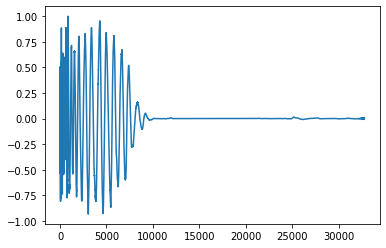

In [15]:
plt.plot(load_sample('m1', 32))
plt.show()
display(load_sample('m1', 32))

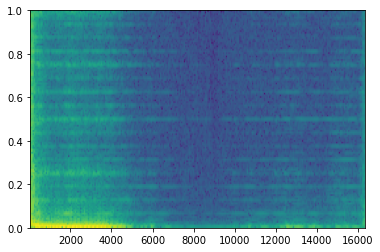

In [16]:
plt.specgram(load_sample('m1', 32))
plt.show()

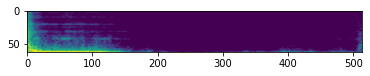

In [77]:
melspec = librosa.feature.melspectrogram(load_sample('m1', 32), Fs, hop_length=64, n_fft=512, n_mels=64)
logmelspec = librosa.power_to_db(melspec)
plt.figure()
plt.imshow(logmelspec[1000:0:-1])
plt.show()